In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import operator
%matplotlib inline
TOP = 15

In [2]:
df_business = pd.read_json('../../dataset/business.json', lines=True)

In [3]:
df_checkin = pd.read_json('../../dataset/checkin.json', lines=True)

In [4]:
top_cities = ["Las Vegas","Phoenix","Toronto","Charlotte","Scottsdale",
              "Pittsburgh","Montréal","Mesa","Henderson","Tempe","Chandler","Edinburgh","Cleveland","Madison","Glendale"]

In [5]:
df_checkin.head(5)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."
2,tJRDll5yqpZwehenzE2cSg,"{'Monday': {'12:00': 1, '1:00': 1}, 'Saturday'..."
3,nhZ1HGWD8lMErdn3FuWuTQ,"{'Sunday': {'18:00': 1, '17:00': 2, '22:00': 1..."
4,vDoXZGE7p6xAkKQ0XQPvoA,"{'Thursday': {'15:00': 1}, 'Saturday': {'23:00..."


In [6]:
df_checkin = pd.merge(df_checkin, df_business[['business_id','latitude','longitude','name','categories','city','neighborhood','review_count','stars']], on='business_id', how='left')

In [7]:
df_checkin.dtypes

business_id      object
time             object
latitude        float64
longitude       float64
name             object
categories       object
city             object
neighborhood     object
review_count      int64
stars           float64
dtype: object

In [8]:
df_checkin.shape
print("Total Checkins: {}".format(df_checkin.shape[0]))

Total Checkins: 135148


In [9]:
c_weekday = Counter()
c_weekend = Counter()


def sum_time(df):
    c = Counter()
    for times in df:    
        for day in times:
            c.update(times[day])    
    return sorted(c.items(), key=operator.itemgetter(1))[-3:]
#             = Counter()
#             if day in ['Monday','Tuesday','Wednesday','Thursday']:
#                 c_weekday.update(times[day])
#             else:
#                 c_weekend.update(times[day])
    
group = df_checkin.groupby(['city']).agg({'time': sum_time})

In [60]:
group = group.reset_index()
cities = pd.DataFrame({'city':top_cities, 'matched':True})
group = group.merge(cities,how='inner',on='city')

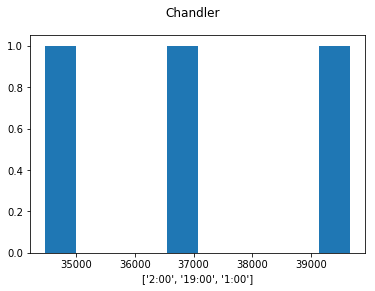

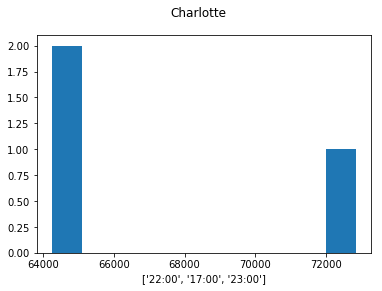

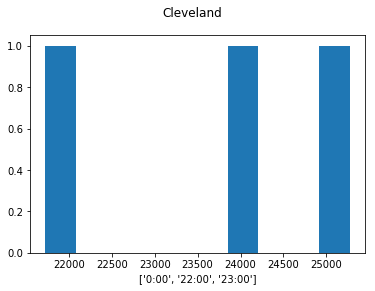

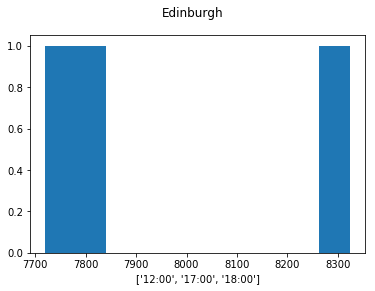

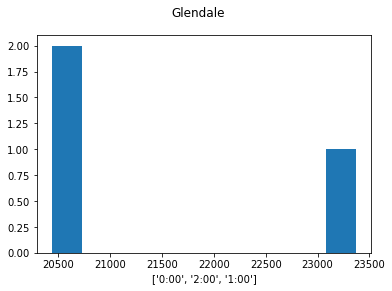

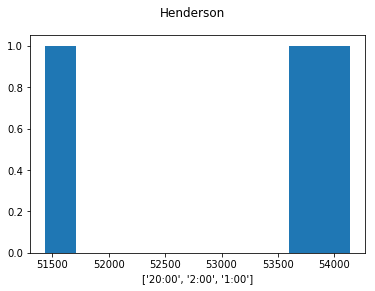

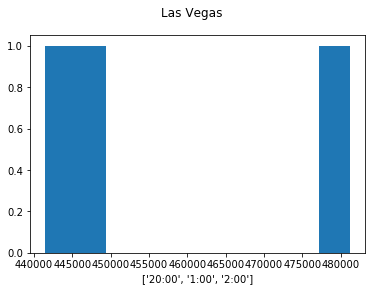

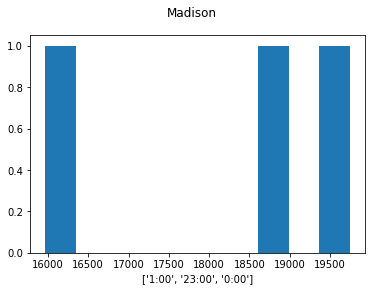

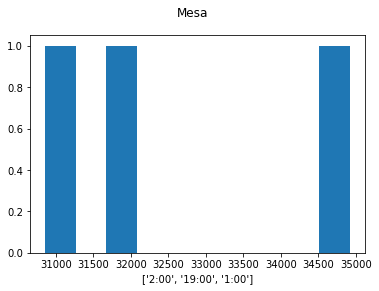

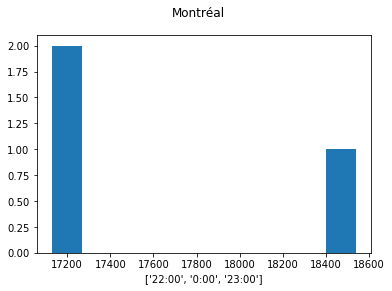

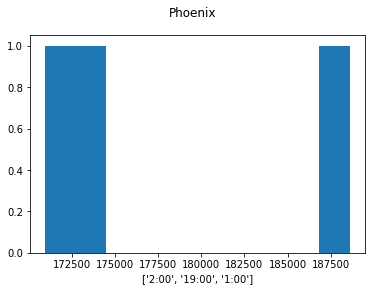

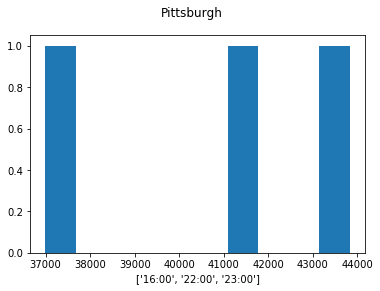

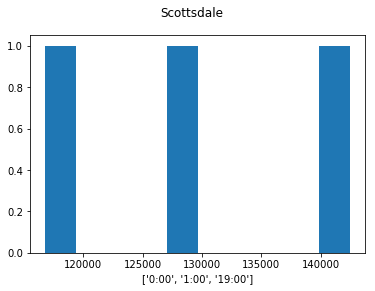

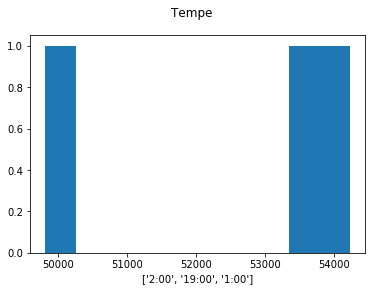

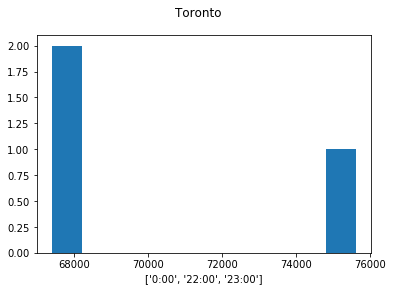

In [99]:
for i in group[['city','time']].values:        
    plt.xlabel([x[0] for x in i[1]])
    plt.hist([x[1] for x in i[1]])
    plt.suptitle(i[0])
    plt.show()    